In [1]:
# Mandatorio al inicio de cada notebook
import os
import warnings
os.chdir(os.path.abspath(".."))
warnings.filterwarnings('ignore')

In [2]:
from src.pipeline import DataPipeline
from src.votaciones import votacion_promedio_simple
from src.feature_extractors import opensmile_features
import pandas as pd

In [3]:
#with open('data/pesos_anotadores_dif_prom.json','r') as f: pesos = json.load(f)

Modulo _imprimir_detalles
model_version: v7
funcion_votacion: votacion_promedio_simple
funcion_features: opensmile_features
lag: 0
cache: True
mapping: Valencia_Basica
min_muestras: 400
filemode: w
epochs: 50
suavizado: False
multiplicador: 1
use_post_process: True
model_architecture: MyKerasModel
rangos_whisper: True
window: NO APLICA
step: NO APLICA

---------------------------------------------------------
Pipeline:
crear_rangos_transcripciones
crear_objetivos
obtener_features
acondicionar_dataset
remover_duplicados
crear_target_categorico
alinear_muestras
entrenar_keras_categorico
guardar_modelo
metricas_modelo_categorico
Ejecutando modulo crear_rangos_transcripciones
---------------------------------------------------------
Ejecutando modulo crear_objetivos
---------------------------------------------------------
Ejecutando modulo obtener_features
Se ha encontrado el dataset de features ya generado, cargando...
Dataset de features cargado con exito
-------------------------------

Epoch 41/50
149/149 [==============================] - 45s 302ms/step - loss: 0.2564 - accuracy: 0.8946 - val_loss: 5.2937 - val_accuracy: 0.3661 - lr: 0.0010
Epoch 42/50
149/149 [==============================] - 45s 304ms/step - loss: 0.2273 - accuracy: 0.9118 - val_loss: 5.3716 - val_accuracy: 0.3646 - lr: 0.0010
Epoch 43/50
149/149 [==============================] - 45s 301ms/step - loss: 0.2150 - accuracy: 0.9142 - val_loss: 5.4461 - val_accuracy: 0.3582 - lr: 0.0010
Epoch 44/50
149/149 [==============================] - 46s 307ms/step - loss: 0.1997 - accuracy: 0.9188 - val_loss: 5.8525 - val_accuracy: 0.3528 - lr: 0.0010
Epoch 45/50
149/149 [==============================] - 45s 304ms/step - loss: 0.2051 - accuracy: 0.9174 - val_loss: 5.9154 - val_accuracy: 0.3766 - lr: 0.0010
Epoch 46/50
149/149 [==============================] - 46s 309ms/step - loss: 0.1817 - accuracy: 0.9293 - val_loss: 6.7500 - val_accuracy: 0.3643 - lr: 0.0010
Epoch 47/50
149/149 [=========================

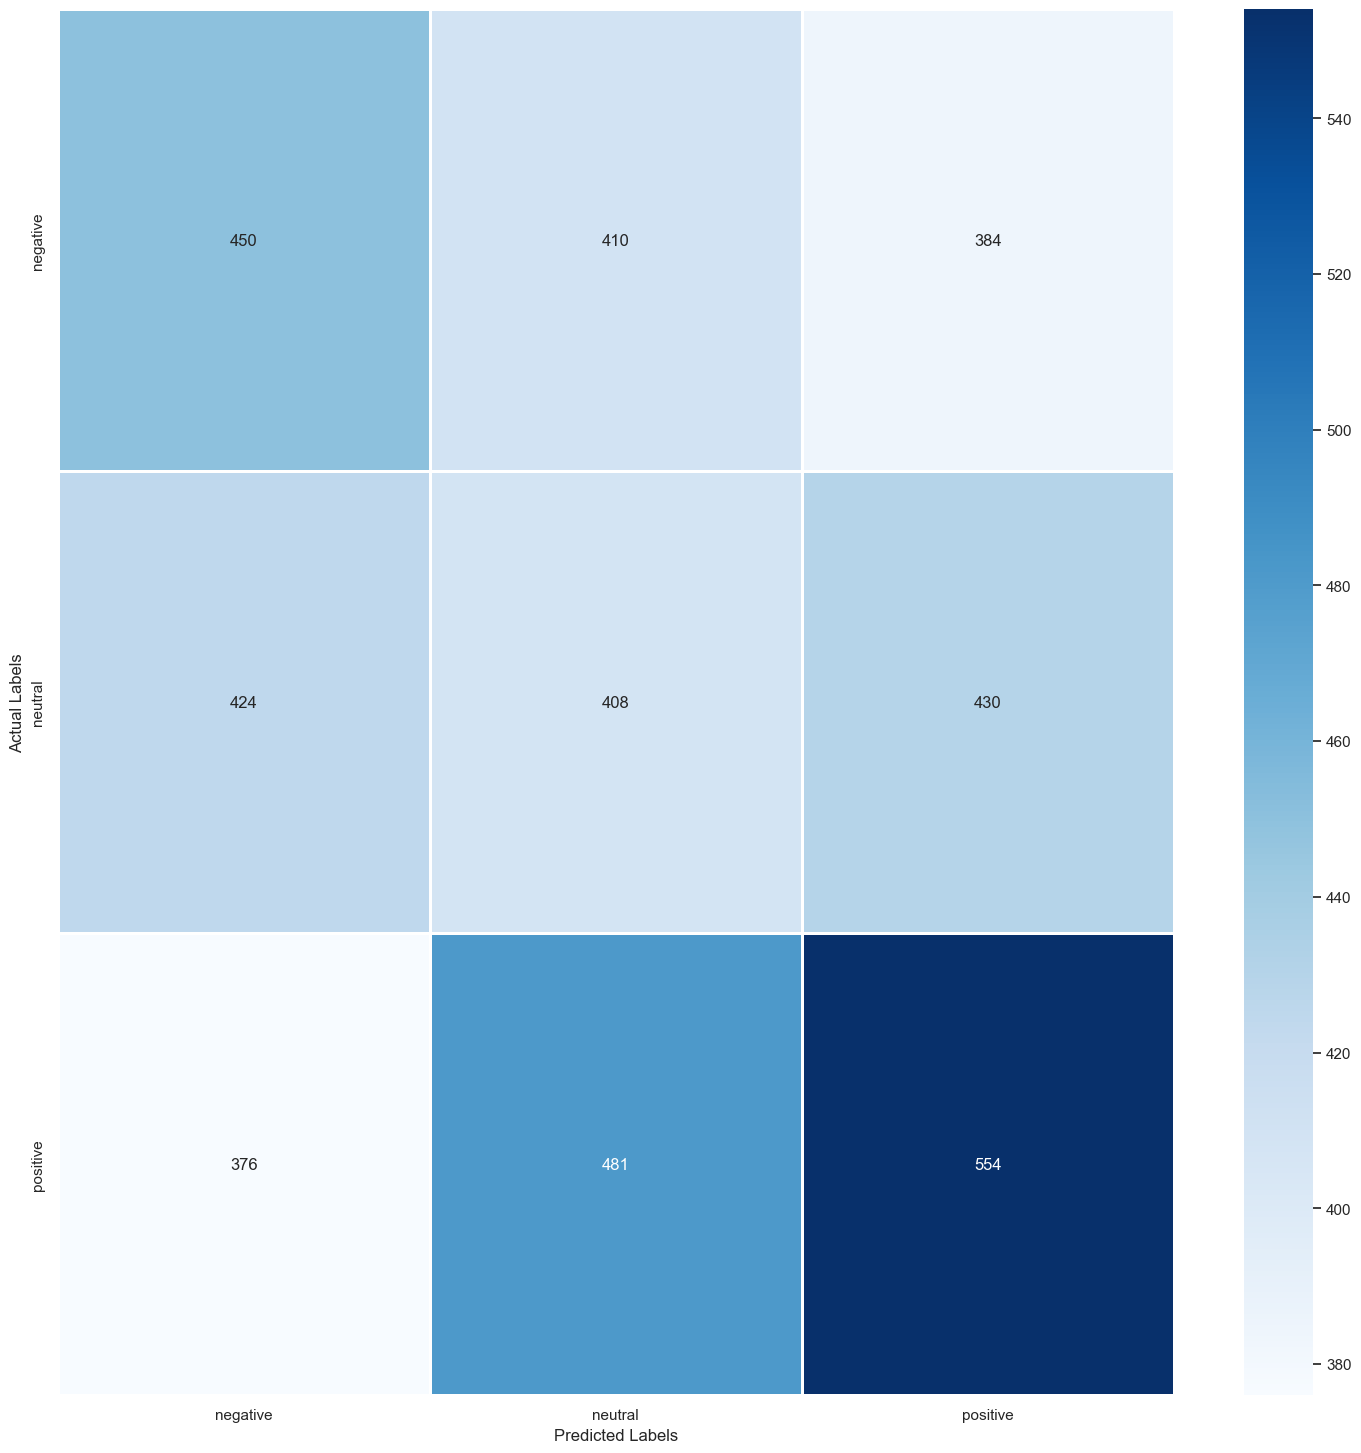

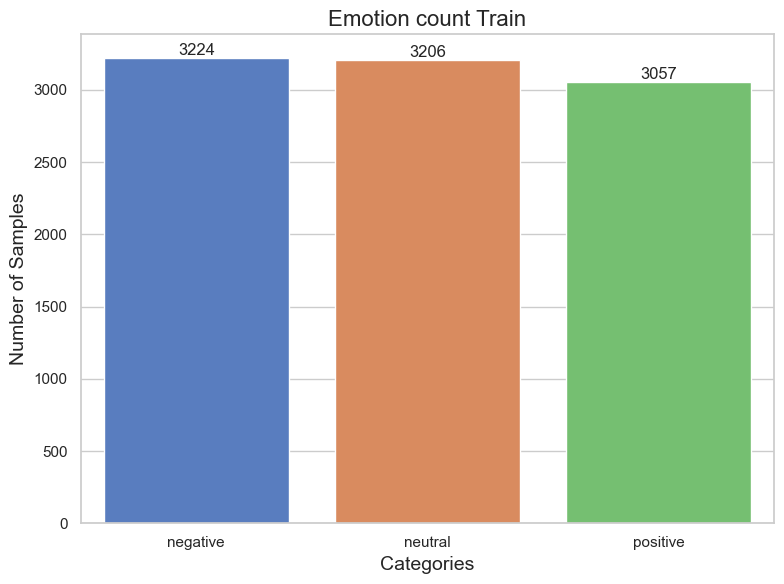

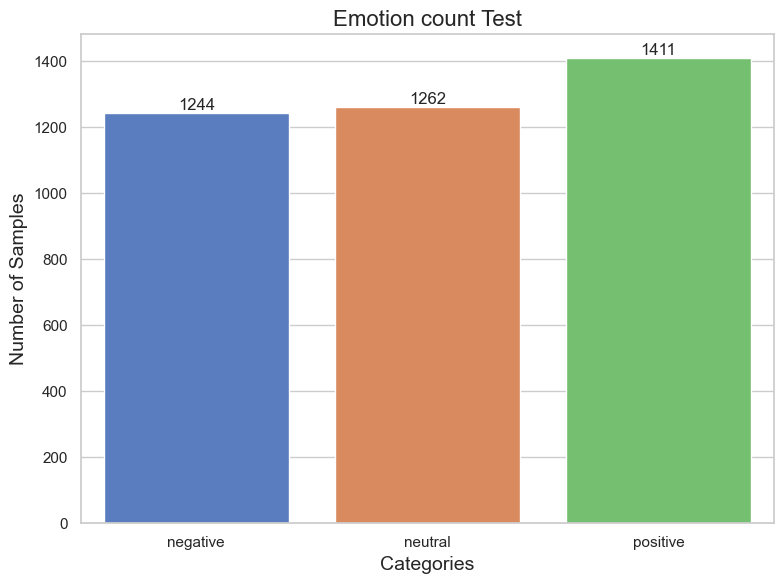

In [4]:
pipeline = DataPipeline('v7',
                        cache = True,
                        funcion_votacion = votacion_promedio_simple,
                        function_features = opensmile_features,
                        mapping = 'Valencia_Basica',
                        epochs = 50,
                        lag = 0,
                        suavizado = False,
                        min_muestras = 400,
                        use_post_process = True,
                        model_architecture = 'MyKerasModel',
                        rangos_whisper = True)

steps = [pipeline.crear_rangos_transcripciones,
        pipeline.crear_objetivos,
        pipeline.obtener_features,
        pipeline.acondicionar_dataset,
        pipeline.remover_duplicados,
        pipeline.crear_target_categorico,
        pipeline.alinear_muestras,
        pipeline.entrenar_keras_categorico,
        pipeline.guardar_modelo,
        pipeline.metricas_modelo_categorico]

pipeline.run_pipeline(steps)